# House Prices: Advanced Regression Technique

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [73]:
# import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.api.types import is_string_dtype, is_numeric_dtype
from IPython.display import Markdown

bold=Markdown
%matplotlib inline

In [74]:
# read data
train=pd.read_csv('resource/train.csv')
test=pd.read_csv('resource/test.csv')
print( train.shape , test.shape)
train.head()

(1460, 81) (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [75]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [76]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## check the distribution of numeric columns

In [92]:
bold('**find numeric columns**')

print (train.dtypes.value_counts())



object     43
int64      35
float64     3
dtype: int64


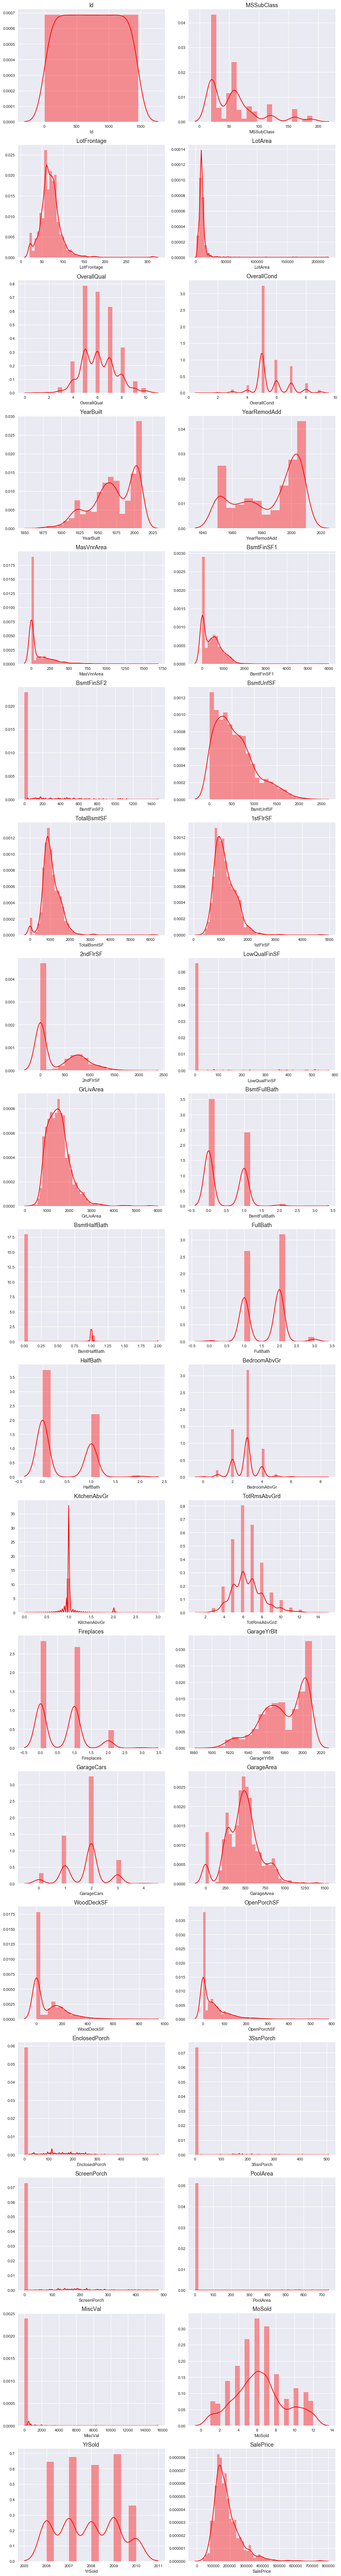

In [113]:

bold('**select numeric using select_dtype(includes=[int,float]**')


numeric_col=train.select_dtypes(include=['int64','float64'])

## we have 3 float and 35 int = total 38  19 *2 
## dont forget dropna() to remove na from plot

fig, axes = plt.subplots(nrows =19, ncols = 2, figsize = (15, 200))
for ax,col in zip(axes.flatten() ,numeric_col.columns):
    sns.distplot(train[col].dropna(), ax=ax, color='r')
    ax.set_title(col, fontsize=14)

fig.tight_layout(rect = [0, 0.5,0.8, 0.95])

In [48]:
# find the difference between train and test
missing = [ a for a in train.columns if a not in test.columns]

missing


['SalePrice']

In [49]:
# check response values

y_train=train.iloc[:,-1]




In [50]:
# find the column number with null value
np.where(train.isnull().sum()>0)



(array([ 3,  6, 25, 26, 30, 31, 32, 33, 35, 42, 57, 58, 59, 60, 63, 64, 72,
        73, 74]),)

In [51]:
train.iloc[:,[ 3,  6, 25, 26, 30, 31, 32, 33, 35, 42, 57, 58, 59, 60, 63, 64, 72,
        73, 74]].head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


In [52]:
train.iloc[:,[3,  6, 25, 26, 30, 31, 32, 33, 35, 42, 57, 58, 59, 60, 63, 64, 72,
        73, 74]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

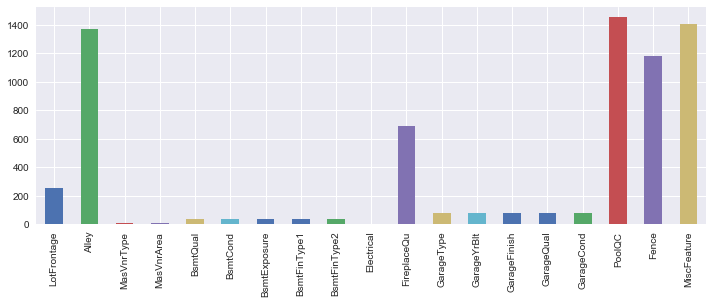

In [53]:
plt.figure(figsize=(12,4))
train.iloc[:,[3,  6, 25, 26, 30, 31, 32, 33, 35, 42, 57, 58, 59, 60, 63, 64, 72,
        73, 74]].isnull().sum().plot(kind='bar')

In [55]:
display(train.dtypes.value_counts())

object     43
int64      35
float64     3
dtype: int64

/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


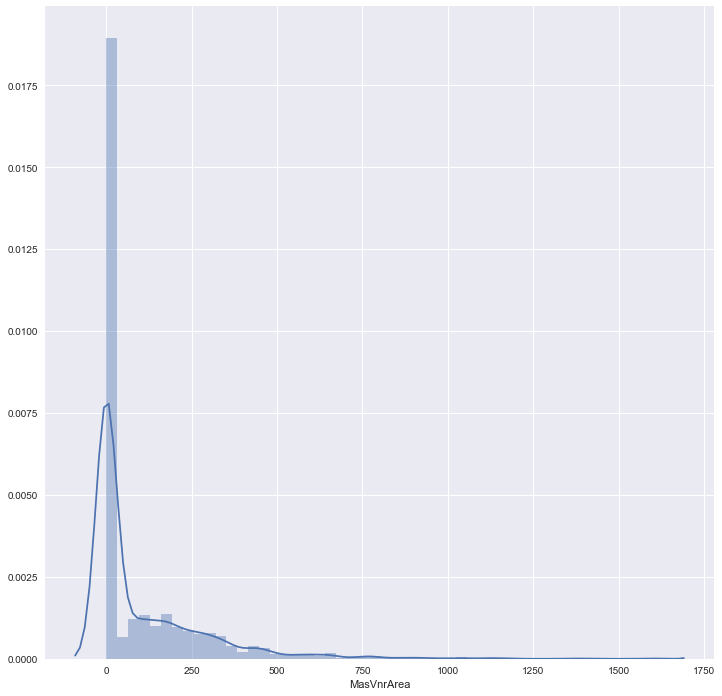

In [60]:
plt.figure(figsize=(12,12))

sns.distplot(train['MasVnrArea'].dropna())

In [11]:
# Find colummns with null value
column_with_null=train.isnull().sum()>0
train[column_with_null.index].head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


### we need to remove columns with more that 1000 null values

In [12]:
np.where(train.isnull().sum()>1000)

(array([ 6, 72, 73, 74]),)

In [13]:
train.iloc[:,[6, 72, 73, 74]].columns

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

### remove above columsn from train and test

In [14]:
train=train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature','SalePrice'], axis=1 )
test=test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1 )

train.shape , test.shape

((1460, 76), (1459, 76))

In [15]:
same_col=[i for i in train.columns if i in test.columns]
len(same_col)

76

In [16]:
train.MSZoning.fillna(value=train.MSZoning.mode(), inplace=True)

train.MSZoning.mode()[0]

'RL'

## filling N/A values
### mode() for category
### mean() for numerical

In [17]:
for col ,val in train.items():
    if is_string_dtype(val): train[f'{col}'].fillna(value=train[f'{col}'].mode()[0], inplace=True)
    else : 
        train[f'{col}'].fillna(value=train[f'{col}'].mean(), inplace=True)


In [18]:
for col ,val in test.items():
    if is_string_dtype(val): test[f'{col}'].fillna(value=test[f'{col}'].mode()[0], inplace=True)
    else : 
        test[f'{col}'].fillna(value=test[f'{col}'].mean(), inplace=True)



In [19]:
test.isnull().sum().sum(), train.isnull().sum().sum()

(0, 0)

In [20]:


# find col with category data type variables 

cat_columns=[]
for col ,val in train.items():
    if is_string_dtype(val): cat_columns.append(col)
        
len(cat_columns)

39

In [21]:
cat_columns_t=[]
for col ,val in test.items():
    if is_string_dtype(val): cat_columns_t.append(col)
        
len(cat_columns_t)

39

In [22]:
test.shape , train.shape

((1459, 76), (1460, 76))

In [23]:

Train = pd.get_dummies(train, columns=cat_columns , drop_first=True)
Test = pd.get_dummies(test, columns=cat_columns_t , drop_first=True)

Test.shape , Train.shape

((1459, 221), (1460, 237))

In [24]:
same_col=[i for i in Train.columns if i in Test.columns]
len(same_col)

221

In [25]:
Train=Train[same_col]
Test=Test[same_col]

In [26]:
Test.shape , Train.shape

((1459, 221), (1460, 221))

In [27]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=50, n_jobs=-1 , criterion='mse')

RF.fit(Train, y_train)


/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [28]:
print (RF.score(Train, y_train))

0.9780815753047624


In [29]:
y=RF.predict(Test)

In [30]:
submission=pd.DataFrame({'Id':Test.Id, 'SalePrice':y})

In [31]:
submission.to_csv('Submission.csv', index=False)

# find the best params

In [32]:
from sklearn.model_selection import GridSearchCV

params=[{'criterion':['mse'],'n_estimators':[30,40,50,100],
         'max_features':[0.5,1,2],'min_samples_leaf':[1,2,3,4],'n_jobs':[-1] 
           
}]

GS=GridSearchCV(RF , param_grid = params  ,cv=10)

In [33]:
GS.fit(Train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['mse'], 'n_estimators': [30, 40, 50, 100], 'max_features': [0.5, 1, 2], 'min_samples_leaf': [1, 2, 3, 4], 'n_jobs': [-1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [34]:
GS.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [35]:
GS.best_score_

0.8711936841361554

In [36]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RF.fit(Train, y_train)
RF.score(Train, y_train)


0.9812376282064361

In [43]:

y=RF.predict(Test)
submission=pd.DataFrame({'Id':Test.Id, 'SalePrice':y})
submission.to_csv('Submission.csv', index=False)

**Preview of Train Data:**

# submit this file and and get 0.1473 accuracy